In [59]:
import pandas as pd

# retrieve data for businesses
businesses = pd.read_csv('csv_data/yelp_academic_dataset_business.csv')

# filter only subways
subways = businesses[businesses['name'].str[0:6] == 'Subway']
print(subways.shape)

(479, 14)


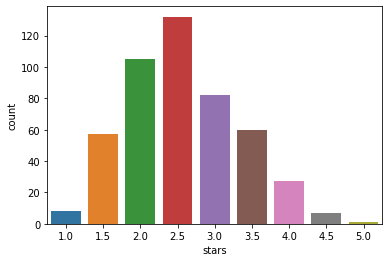

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# let's visualize the distribution of stars to check how skewed is the data
sns.countplot(data=subways, x='stars')
plt.show()

(14, 5)


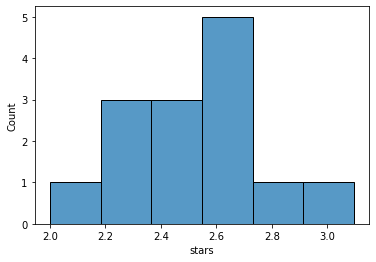

In [61]:
# we now group the subways by city
subways_by_state = subways.groupby('state').mean()
print(subways_by_state.shape)

# let's visualize the distribution of stars to check how skewed is the data
sns.histplot(data=subways_by_state, x='stars')
plt.savefig('figures/subways_stars_distribution.png', dpi=80)
plt.show()

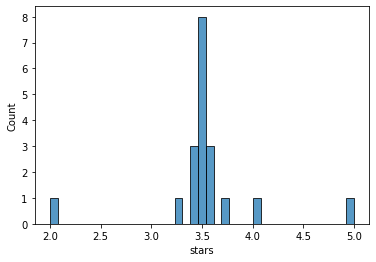

In [62]:
# getting the mean rating per city
restaurants = businesses.fillna('dummy')
restaurants = restaurants[restaurants['categories'].str.contains('Restaurants')]
restaurants_by_state = restaurants.groupby('state').mean()

# let's visualize the distribution of stars to check how skewed is the data
sns.histplot(data=restaurants_by_state, x='stars')
plt.show()

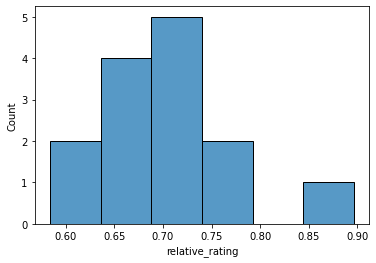

        latitude   longitude     stars  review_count   is_open  state_mean  \
state                                                                        
AB     53.536643 -113.501557  2.733333      5.866667  0.933333    3.495021   
AZ     32.240349 -110.938737  3.096154      9.865385  0.903846    3.453201   
CA     34.423724 -119.744470  2.550000     15.000000  0.600000    3.762705   
DE     39.755357  -75.581567  2.000000      6.333333  0.333333    3.426639   
FL     27.997499  -82.545453  2.558824      8.294118  0.858824    3.578342   
ID     43.618186 -116.293065  2.333333      7.500000  1.000000    3.544931   
IL     38.655141  -89.965115  2.200000      6.866667  0.933333    3.304171   
IN     39.794806  -86.145442  2.686441      7.661017  0.898305    3.464699   
LA     29.972253  -90.119592  2.244186     10.651163  0.813953    3.595192   
MO     38.612973  -90.363701  2.550000      9.260000  0.940000    3.445844   
NJ     39.891982  -74.968782  2.437500      5.000000  0.250000  

In [64]:
# add mean to subway_by_city and find relative rating
subways_by_state['state_mean'] = 0
for state in subways_by_state.index:
    subways_by_state.loc[state, 'state_mean'] = restaurants_by_state.loc[state, 'stars']
subways_by_state['relative_rating'] = subways_by_state['stars'] / subways_by_state['state_mean']

# let's visualize the distribution of relative ratings
sns.histplot(data=subways_by_state, x='relative_rating')
plt.show()

print(subways_by_state)

In [65]:
# create a dataframe with info for states
states, postal = pd.read_csv('csv_data/states_gdp.csv', sep="\t"), pd.read_csv('csv_data/postal.csv', sep="\t")
states_info = states.merge(postal, left_on=' A', right_on=' state')[[' state', 'postal', 'GDPPC']]
states_info['GDPPC'] = (states_info['GDPPC'].str[1:-4] + states_info['GDPPC'].str[-3:-1] + states_info['GDPPC'].str[-1]).astype(int)
print(states_info)

              state postal   GDPPC
0           Alabama     AL   49027
1            Alaska     AK   75027
2           Arizona     AZ   56511
3          Arkansas     AR   47770
4        California     CA   85546
5          Colorado     CO   72597
6       Connecticut     CT   82233
7          Delaware     DE   80446
8           Florida     FL   56301
9           Georgia     GA   63271
10           Hawaii     HI   62474
11            Idaho     ID   49616
12         Illinois     IL   74052
13          Indiana     IN   61760
14             Iowa     IA   68849
15           Kansas     KS   65530
16         Kentucky     KY   52002
17        Louisiana     LA   55213
18            Maine     ME   55425
19         Maryland     MD   71083
20    Massachusetts     MA   91129
21         Michigan     MI   56554
22        Minnesota     MN   72187
23      Mississippi     MS   42411
24         Missouri     MO   58356
25          Montana     MT   53703
26         Nebraska     NE   76584
27           Nevada 

In [71]:
subways_info = subways_by_state.merge(states_info, left_on='state', right_on='postal')
print(subways_info)

     latitude   longitude     stars  review_count   is_open  state_mean  \
0   32.240349 -110.938737  3.096154      9.865385  0.903846    3.453201   
1   34.423724 -119.744470  2.550000     15.000000  0.600000    3.762705   
2   39.755357  -75.581567  2.000000      6.333333  0.333333    3.426639   
3   27.997499  -82.545453  2.558824      8.294118  0.858824    3.578342   
4   43.618186 -116.293065  2.333333      7.500000  1.000000    3.544931   
5   38.655141  -89.965115  2.200000      6.866667  0.933333    3.304171   
6   39.794806  -86.145442  2.686441      7.661017  0.898305    3.464699   
7   29.972253  -90.119592  2.244186     10.651163  0.813953    3.595192   
8   38.612973  -90.363701  2.550000      9.260000  0.940000    3.445844   
9   39.891982  -74.968782  2.437500      5.000000  0.250000    3.484136   
10  39.527952 -119.789958  2.400000     17.800000  0.633333    3.537956   
11  40.045786  -75.207007  2.583333      7.770833  0.541667    3.521557   
12  36.113910  -86.766436

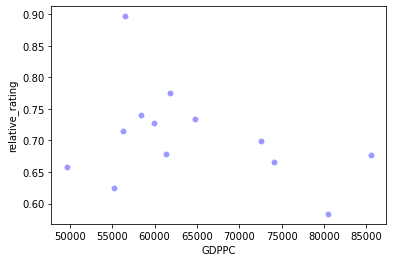

In [73]:
sns.scatterplot(data=subways_info, x='GDPPC', y='relative_rating', color='blue', alpha=0.4)
plt.savefig('figures/state_gdppc_vs_mean_rating.png', dpi=100)
plt.show()